## What's spaCy
spaCy is **free, open-source library** for advanced **Natural Language Processing (NLP)** in Python.

For example:
   * What does the words mean in the context?
   * Who is doing what to whom?
   * What products and companies are mentioned in the text?
   * Which texts are similar to each other?

spaCy is designed specifically for **production use** and helps to build applications that process and "understand" large volume of texts. It can be used to build **Information Extraction** or **natural Language Processing** systems, or to pre-process text for **deep learning**.

In [1]:
import spacy 

nlp = spacy.load('en_core_web_sm')
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.pos_, token.dep_, token.lemma_)
    
# Text     : The original word text
# Lemma    : The base form of the text
# POS      : The simple part-of-speech tag
# Tag      : The detailed part-of-speech tag
# Dep      : Syntactic dependancy, i.e. the relation between tokens
# Shape    : The word shape - capitalization, punctuation, digits
# is alpha : is the token an alpha character?
# is stop  : Is the token part of a stop list, i.e. the most common words of the language

Apple PROPN nsubj Apple
is AUX aux be
looking VERB ROOT look
at ADP prep at
buying VERB pcomp buy
U.K. PROPN dobj U.K.
startup NOUN dep startup
for ADP prep for
$ SYM quantmod $
1 NUM compound 1
billion NUM pobj billion


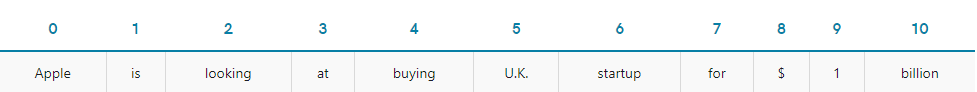

The raw text is `split on whitespace characters`, similar to text.split(' '). Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:

1) **Does the substring match a tokenizer exception rule?** For example, “don’t” does not contain whitespace, but should be split into two tokens, “do” and “n’t”, while “U.K.” should always remain one token.


2) **Can a prefix, suffix or infix be split off?** For example punctuation like commas, periods, hyphens or quotes.

If there’s a match, the rule is applied and the tokenizer continues its loop, starting with the newly split substrings. This way, spaCy can split **complex, nested tokens** like combinations of abbreviations and multiple punctuation marks.

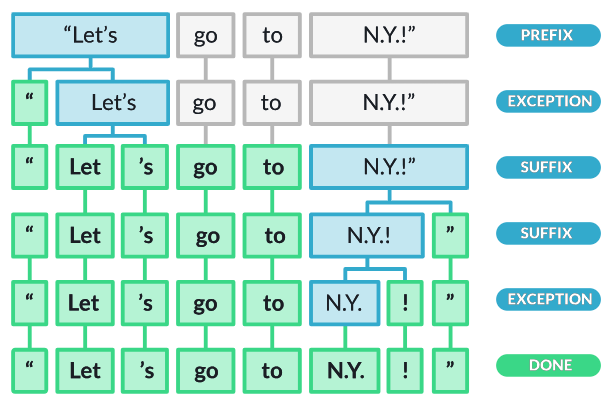

## Part-of-speech (POS) tags and dependencies

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


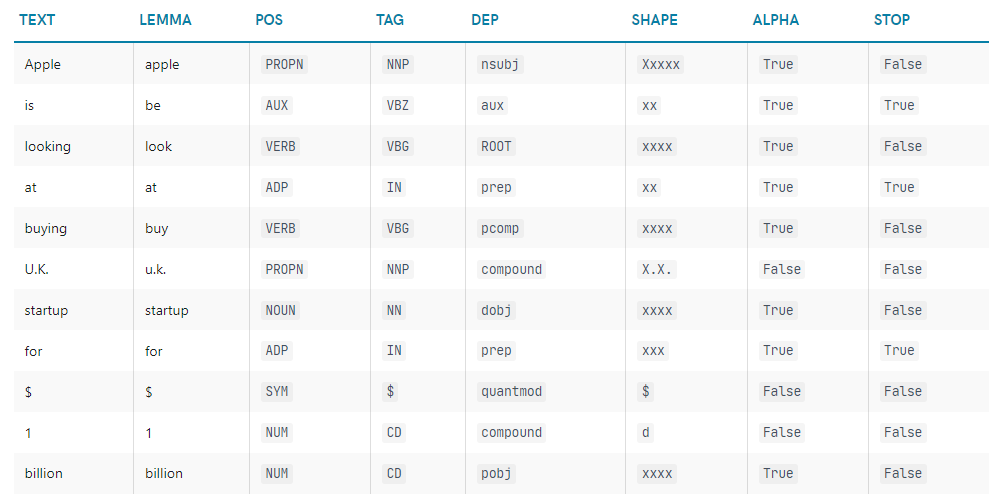

The dependency **visualizer**, **`dep`**, shows part-of-speech tags and syntactic dependencies.

In [3]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")
displacy.serve(doc, style="dep")

C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\spacy\displacy\__init__.py:108: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Named Entities
A **named entity** is a “real-world object” that’s assigned a name – for example, `a person, a country, a product or a book title`. spaCy can recognize various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later, depending on your use case.

Named entities are available as the ents property of a Doc:

In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


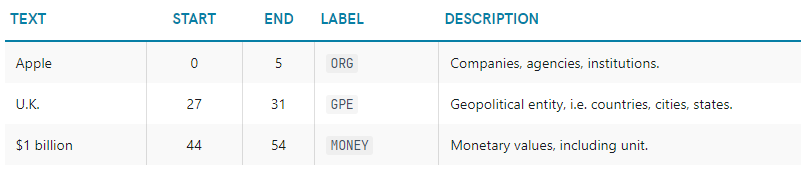

## Visualizing the Named Entity Recognizer

In [5]:
import spacy
from spacy import displacy

text = "Apple is looking at buying U.K. startup for $1 billion"

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Word vectors and similarity
**Similarity** is determined by comparing word vectors or “word embeddings”, **multi-dimensional** meaning representations of a word. **Word vectors** can be generated using an algorithm like word2vec and usually look like this:

In [6]:
import spacy 
spacy.cli.download("en_core_web_md")
import en_core_web_md
nlp = en_core_web_md.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import spacy

nlp = spacy.load("en_core_web_md") # make sure to use larger model!!!
tokens = nlp("lion bear apple banana pomegranate fjglergiv")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

# Vector norm  : The L2 norm of the token's vector (the square root of the sum of the values squared)
# has vector   : Does the token have a vector representation?
# OOV          : Out-of-vocabulary

lion True 55.145737 False
bear True 52.114674 False
apple True 43.366478 False
banana True 31.620354 False
pomegranate True 39.4917 False
fjglergiv False 0.0 True


The words “lion”, “bear”, “apple”, "banana" and "pomegranate" are all pretty common in English, so they’re part of the pipeline’s vocabulary, and come with a vector. The word “fjglergiv” on the other hand is a lot less common and out-of-vocabulary

In [12]:
import spacy

nlp = spacy.load("en_core_web_md") # make sure to use larger model!!!
tokens = nlp("lion bear apple banana pomegranate fjglergiv")

for token11 in tokens:
    for token12 in tokens:
        print(token11.text, token12.text, token11.similarity(token12))

lion lion 1.0
lion bear 0.40031397342681885
lion apple 0.06742795556783676
lion banana 0.11355724185705185
lion pomegranate 0.1322288066148758
lion fjglergiv 0.0
bear lion 0.40031397342681885
bear bear 1.0
bear apple 0.18584339320659637
bear banana 0.15492628514766693
bear pomegranate 0.22987063229084015
bear fjglergiv 0.0
apple lion 0.06742795556783676
apple bear 0.18584339320659637
apple apple 1.0
apple banana 0.6646701097488403
apple pomegranate 0.6778837442398071
apple fjglergiv 0.0
banana lion 0.11355724185705185
banana bear 0.15492628514766693
banana apple 0.6646701097488403
banana banana 1.0
banana pomegranate 0.6069874167442322
banana fjglergiv 0.0
pomegranate lion 0.1322288066148758
pomegranate bear 0.22987063229084015
pomegranate apple 0.6778837442398071
pomegranate banana 0.6069874167442322
pomegranate pomegranate 1.0
pomegranate fjglergiv 0.0
fjglergiv lion 0.0
fjglergiv bear 0.0
fjglergiv apple 0.0
fjglergiv banana 0.0
fjglergiv pomegranate 0.0
fjglergiv fjglergiv 1.0


C:\Users\6917\AppData\Local\Temp\ipykernel_34452\1879763523.py:8: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token11.text, token12.text, token11.similarity(token12))


In this case, we can see that Lion and Bear have a similarity of 40%. Identical tokens are obviously 100% to each other.

## Pipelines
When you call nlp on a text, spaCy first tokenizes the text to produce a **`Doc`** object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.
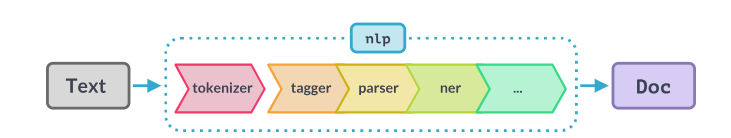

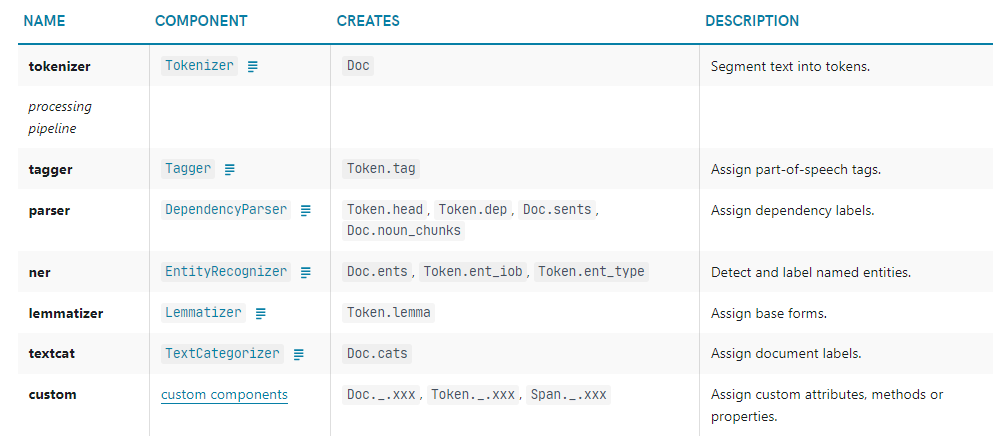

## Vocab, hashes and lexemes
Whenever possible, spaCy tries to store data in a vocabulary, the Vocab, that will be shared by multiple documents. To save memory, spaCy also encodes all strings to hash values – in this case for example, “coffee” has the hash 3197928453018144401. Entity labels like “ORG” and part-of-speech tags like “VERB” are also encoded. Internally, spaCy only “speaks” in hash values.
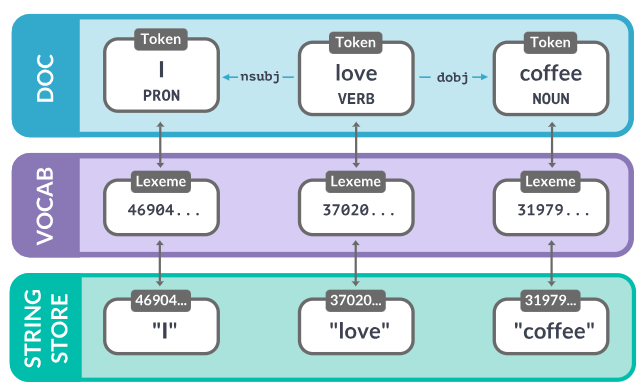
If you process lots of documents containing the word “coffee” in all kinds of different contexts, storing the exact string “coffee” every time would take up way too much space. So instead, spaCy hashes the string and stores it in the StringStore. You can think of the StringStore as a lookup table that works in both directions – you can look up a string to get its hash, or a hash to get its string:

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee'

3197928453018144401
coffee


In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
            lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

# Text: The original text of the lexeme.
# Orth: The hash value of the lexeme.
# Shape: The abstract word shape of the lexeme.
# Prefix: By default, the first letter of the word string.
# Suffix: By default, the last three letters of the word string.
# is alpha: Does the lexeme consist of alphabetic characters?
# is digit: Does the lexeme consist of digits?

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
coffee 3197928453018144401 xxxx c fee True False False en


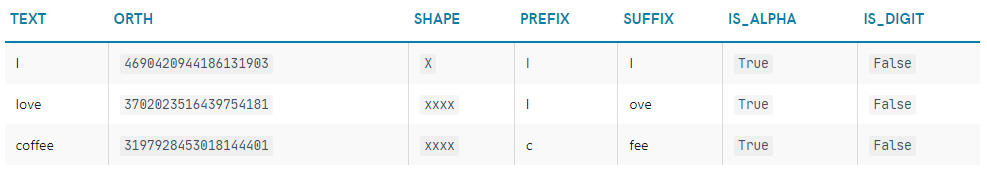

In [20]:
import spacy
from spacy.tokens import Doc
from spacy.vocab import Vocab

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love tea")  # Original Doc
print(doc.vocab.strings["tea"])  # 6041671307218480733
print(doc.vocab.strings[6041671307218480733])  # 'tea' 👍

empty_doc = Doc(Vocab())  # New Doc with empty Vocab
# empty_doc.vocab.strings[3197928453018144401] will raise an error :(

empty_doc.vocab.strings.add("coffee")  # Add "coffee" and generate hash
print(empty_doc.vocab.strings[3197928453018144401])  # 'coffee' 👍

new_doc = Doc(doc.vocab)  # Create new doc with first doc's vocab
print(new_doc.vocab.strings[3197928453018144401])  # 'coffee' 👍


6041671307218480733
tea
coffee
coffee
